# Predicting infrastructure failures

Putting together all the easy-to-access data sources, we can start making predictive models.

In [1]:
%matplotlib inline
import pandas
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.metrics

def predict_failures(df, predictive_columns):
    model = sklearn.linear_model.LogisticRegression()
    predictions = sklearn.cross_validation.cross_val_predict(model,
                                                         df[predictive_columns],
                                                         df.Equipment_Failure,
                                                         cv=2
                                                        )
    print predictions
    print "%.0f%% accuracy" % (sklearn.metrics.accuracy_score(df.Equipment_Failure, predictions)*100.0,)

In [2]:
df = pandas.read_csv('playground-data.csv', parse_dates='Date', index_col='Date')
df

,Previous_Week_Sentiment,Child_Occupation_Ratio,Adults_or_Teens_Present,Cracking,Traffic_Volume,Equipment_Failure
Date,,,,,,
2015-03-01,0.0,0.020,51,0,1.1,0
2015-03-08,0.0,0.300,21,0,2.3,0
2015-03-15,0.0,0.250,19,1,2.9,0
2015-03-22,0.9,0.170,14,0,2.7,0
2015-03-29,0.0,0.200,13,0,2.5,0
2015-04-05,0.0,0.001,41,0,1.2,1
2015-04-12,0.0,0.090,29,0,1.2,0
2015-04-19,-0.5,0.030,25,1,1.2,0
2015-04-26,-0.7,0.001,44,1,2.0,1


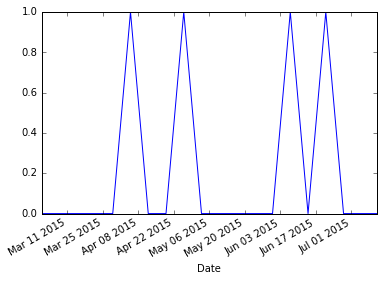

In [3]:
df.Equipment_Failure.plot()

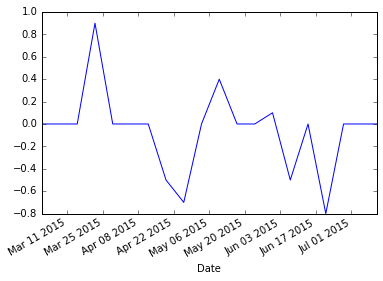

In [4]:
df.Previous_Week_Sentiment.plot()

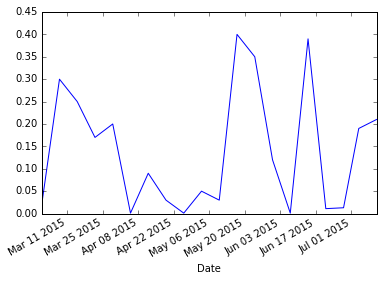

In [5]:
df.Child_Occupation_Ratio.plot()

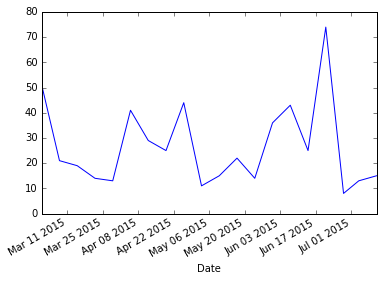

In [6]:
df.Adults_or_Teens_Present.plot()

In [ ]:
df.Traffic_Volume.plot()

In [ ]:
df.Cracking.plot()

In [7]:
predictions = predict_failures(df,['Previous_Week_Sentiment'] )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
80% accuracy


In [8]:
predictions = predict_failures(df,['Previous_Week_Sentiment', 
                                   'Child_Occupation_Ratio', 
                                   'Adults_or_Teens_Present',
                                   'Traffic_Volume', 
                                   "Cracking"] )

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
90% accuracy


In [9]:
df['Child_Adult_Balance'] = df.Adults_or_Teens_Present / df.Child_Occupation_Ratio

In [10]:
predictions = predict_failures(df,['Previous_Week_Sentiment', 
                                   'Child_Occupation_Ratio', 
                                   'Adults_or_Teens_Present',
                                   'Traffic_Volume', 
                                   "Cracking",
                                   "Child_Adult_Balance"
                                  ] )

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
95% accuracy
